In [25]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [26]:
import pandas as pd
%matplotlib inline

1) Изучить набор данных. Создать описание набора данных на русском языке. Описать признаки, используемые в наборе данных (включить полученные описания в отчёт).

"mpg"-потребление топлива; "cylinders"-количество цилиндров; "displacement"-литраж; "horsepower"-мощность; "weight"-вес; "acceleration"-ускорение; "model_year"-год выпуска; "origin"-место производства; "car_name"-название модели;

In [27]:
df = pd.read_csv('auto-mpg.data.txt', sep='\s+', names=["mpg","cylinders","displacement","horsepower","weight","acceleration","model_year", "origin","car_name"])
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger


In [28]:
df.shape

(398, 9)

df.info()

In [29]:
df.drop_duplicates()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger


In [30]:
df = df.drop_duplicates() #удаление дубликатов
df = df.dropna().reset_index(drop=True)
print('dataset size: ', df.shape)

dataset size:  (398, 9)


3.Выполните масштабирование количественных признаков; Постройте диаграммы BoxPlot для признаков до и после масштабирования. Выберите способ масштабирования (например, нормализацию или стандартизацию);

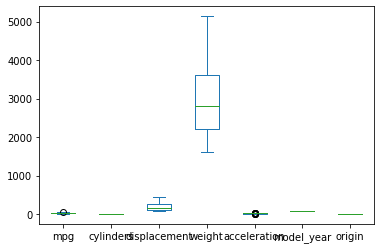

In [31]:
import seaborn as sns
df.plot.box();

In [32]:
numerical_columns = [i for i in df.columns if df[i].dtype.name != 'object']
categorial_columns = [i for i in df.columns if df[i].dtype.name == 'object']

print('numerical: ', numerical_columns)
print('categorial: ', categorial_columns)

numerical:  ['mpg', 'cylinders', 'displacement', 'weight', 'acceleration', 'model_year', 'origin']
categorial:  ['horsepower', 'car_name']


In [33]:
#нормализация количественных признаков
import sklearn as sk
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,0.239362,1.0,0.617571,130.0,0.536150,0.238095,0.0,0.0,chevrolet chevelle malibu
1,0.159574,1.0,0.728682,165.0,0.589736,0.208333,0.0,0.0,buick skylark 320
2,0.239362,1.0,0.645995,150.0,0.516870,0.178571,0.0,0.0,plymouth satellite
3,0.186170,1.0,0.609819,150.0,0.516019,0.238095,0.0,0.0,amc rebel sst
4,0.212766,1.0,0.604651,140.0,0.520556,0.148810,0.0,0.0,ford torino


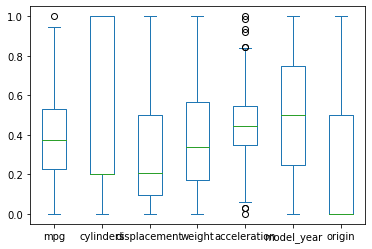

In [34]:
df.plot.box();

4) Выполните замену категориальных признаков; выберите и обоснуйте способ замены;

In [35]:
categorical_attributes = [column for column in df.columns if df[column].dtype.name == 'object']
print(categorical_attributes)
df = df.drop(categorical_attributes, axis=1)

['horsepower', 'car_name']


5) Оцените корреляцию между признаков и удалите те признаки, которые коррелируют с наибольшим числом других;

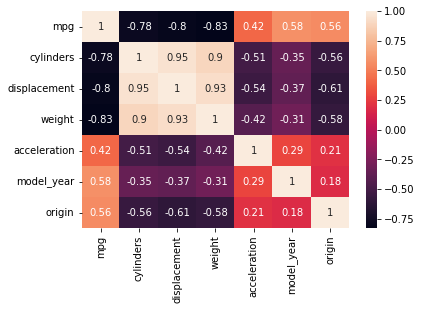

In [36]:
sns.heatmap(df.corr(),annot=True)#функция для отображения коэффициента корреляции

6) Заполните пропущенные значения в данных;

In [37]:
df.isnull()#отсутствие данных

,mpg,cylinders,displacement,weight,acceleration,model_year,origin
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
393,False,False,False,False,False,False,False
394,False,False,False,False,False,False,False
395,False,False,False,False,False,False,False
396,False,False,False,False,False,False,False


In [38]:
df.isnull()#отсутствие данных

,mpg,cylinders,displacement,weight,acceleration,model_year,origin
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
393,False,False,False,False,False,False,False
394,False,False,False,False,False,False,False
395,False,False,False,False,False,False,False
396,False,False,False,False,False,False,False


In [39]:
df.count()#пропусков нет

mpg             398
cylinders       398
displacement    398
weight          398
acceleration    398
model_year      398
origin          398
dtype: int64

7) Решите поставленную задачу регрессии в соответствии с заданием. При подборе параметров метода принятия решения (метода регрессии) используйте перекрёстную проверку (изучите возможные для изменения параметры метода регрессии).  Вычислите точность решения задачи, вычислив разницу между реальным значением и предсказанным. Вычислите коэффициент корреляции (Пирсона, Спирмена) между реальным значением и предсказанным с учётом p-value. 

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
# разделим полученные данные на данные для обучения и теста
X = df.drop(['mpg'], axis=1)#признаки
Y = df['mpg']#классы
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)#обучающиая выбо

Линейная регрессия без использования регуляризаторов

In [42]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, Y_train)
reg_predic = reg.predict(X_test)

In [43]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from scipy.stats import pearsonr, spearmanr
print('Error = %8.5f' %mean_squared_error(reg_predic, Y_test))#погрешность
#print('Mean Absolute Error = %8.5f' %mean_absolute_error(reg_predic, Y_test))
#print()

print('Pearson correl: %8.6f' %pearsonr(reg_predic, Y_test)[0])#корреляция по Пирсону
print('p-value:', pearsonr(reg_predic, Y_test)[1])
#print()
print('Spearman rank correl: %8.6f' %spearmanr(reg_predic, Y_test)[0])#по Спирмену
print('p-value:', spearmanr(reg_predic, Y_test)[1])

Error =  0.00819
Pearson correl: 0.907743
p-value: 2.466475333288237e-46
Spearman rank correl: 0.940915
p-value: 2.5163691031687546e-57


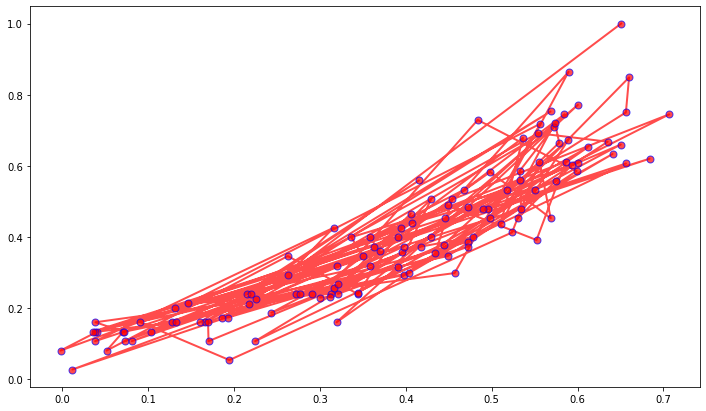

In [44]:
from matplotlib import pyplot as plt
plt.figure(figsize=(12, 7))
plt.plot(reg_predic, Y_test, 'o-r', alpha=0.7, label="first", lw=2, mec='b', mew=1, ms=7)

In [45]:
from sklearn.linear_model import Ridge
import numpy as np
from sklearn.model_selection import  GridSearchCV
#Линейная регрессия, RIDGE регуляризатор
rid = Ridge()
parameters_rid = {'alpha': np.linspace(1, 5, 25)}
grid_rid = GridSearchCV(rid, parameters_rid) 
grid_rid = grid_rid.fit(X_train, Y_train)
alpha = grid_rid.best_estimator_.alpha
rid = Ridge(alpha = alpha)
rid.fit(X_train, Y_train)
pred = rid.predict(X_test)
print(pred[:10] - Y_test[:10])

65    -0.029730
132   -0.029426
74    -0.007338
78     0.031003
37    -0.019554
54    -0.162537
294   -0.041551
60     0.092424
12    -0.068081
341    0.087257
Name: mpg, dtype: float64


In [46]:
person, pvalue = pearsonr(pred, Y_test)
print("Корреляция Пирсона.: ", person)
print("p_value:", pvalue)
spermen, pvalue = spearmanr(pred, Y_test)
print("Корреляция Спирмена: ", spermen)
print("p_value:", pvalue)

Корреляция Пирсона.:  0.9057066370329074
p_value: 8.413859223326775e-46
Корреляция Спирмена:  0.9437807978989255
p_value: 1.4559647217411796e-58


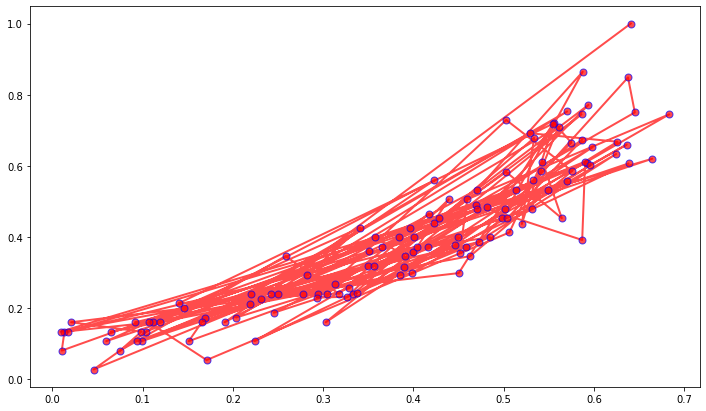

In [47]:
plt.figure(figsize=(12, 7))
plt.plot(pred, Y_test, 'o-r', alpha=0.7, label="first", lw=2, mec='b', mew=1, ms=7)